Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Size of the image is : (52, 18, 3)
Sample of an image pixel data:
Image : [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [46 71 87]
  [38 60 76]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [33 67 49]
  [31 76 29]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [33 55 48]
  [35 63 44]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[39 71 71]
  [36 56 56]
  [36 55 53]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


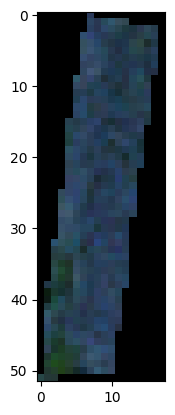

In [48]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd


image_path = "D:/Data science/satellite_images/1_2022_4.tif"
image_folder = "D:/Data science/satellite_images"

image_list = os.listdir(image_folder)
# Data exploration
for image_name in image_list[:10]:
    image_path = os.path.join(image_folder,image_name)
    image  = cv2.imread(image_path)
    print(f"Size of the image is : {image.shape}")
print(f"Sample of an image pixel data:")
print(f"Image : {image}")
# As we can see there is lot of zero values associated here which from my observations corresponds to blank black spaces corresponds to zero alpha values

# Image visualisation
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
# as we cam see image data has some unncessasry values in form of zero values of padding which is different in every cases
# Hence need to remove this values which does not contribute much to results

## After doing data exploration
### Conclusion is that unnecessary zeros creates problem that need to removed
Also since our data has prominently only two colors majorly which is Brown and green on the distribution of this two colors class of the image can be predicted but for that we need to delete all the unnecesssary zero terms.

After doing this approach will be to form a histogram which collects the counts of color being in the different range and on the basis of that distribution K-Means clustering will cluster data in THREE Classes. 
Since our data is Unsupervised and things can be achieved from conventional machine learning algorithms K-Means clustering.

But to make Clustering more accurate only important imformation has to be feed and to do this Principal Component Analysis method comes to help to reduce dimensionality and transform the data which can be more informative.

In [40]:
def extract_color_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flatten the image into a 1D array
    pixels = image_rgb.reshape((-1, 3))
    pixels = pixels.flatten()
    
    #as there is unncessary white spaces which is not needed hence we have removed value zero which describes zero alpha value
    #outside of necessary field. Dropping zeros to improve performance
    
    pixels = pixels[pixels != 0]
    
    # Calculate the color histogram
    hist = np.histogramdd(pixels,bins = 255)[0]
    
    # Normalize the histogram
    hist /= hist.sum()
    
    return hist.flatten()

In [41]:
def create_feature_matrix(image_folder):
    features = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".tif") or filename.endswith(".png"):  # Adjust based on your image format
            image_path = os.path.join(image_folder, filename)
            color_features = extract_color_features(image_path)
            features.append(color_features)
    return np.array(features)

In [42]:
image_dataset = create_feature_matrix(image_folder)

In [43]:
len(image_dataset)

6816

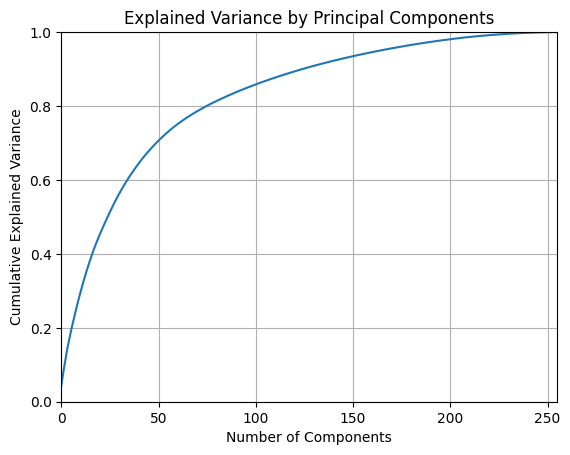

In [44]:
# Lets apply feature analysis before diving into clustering
from sklearn.decomposition import PCA

pca = PCA(n_components=None) 
flattened_dataset_pca = pca.fit_transform(image_dataset)

# Plotting the explained variance ratio
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Ploting the cumulative explained variance
plt.xlim(0,len(image_dataset[0]))
plt.ylim(0,1)
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)

As 95% variance could also be explained with Number of  components between 150 to 200. 

But chose between value which is Number of component = 180

In [45]:
n_components_final = 170  # Replace with your chosen number or threshold

# Reapply PCA with the chosen number of components
pca_final = PCA(n_components=n_components_final)
flattened_dataset_pca_final = pca_final.fit_transform(image_dataset)

In [46]:
print(f"The shape of image dataset is {image_dataset.shape} and shape of the image in side of dataset is {image_dataset[5].shape}")

The shape of image dataset is (6816, 255) and shape of the image in side of dataset is (255,)


In [47]:
# Now lets apply clustering to the image data and divide it in classes
kmeans = KMeans(n_clusters=3,max_iter=500)
labels = kmeans.fit_predict(flattened_dataset_pca_final)

C:\Users\91942\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
class_mapping = {0:'No Crop', 1:'Growing',2:'Lush'}
class_data = [class_mapping[value] for value in labels]
output_class_dataframe = pd.DataFrame(class_data,columns=['Classification'])

In [57]:
output_class_dataframe

,Classification
0,No Crop
1,No Crop
2,No Crop
3,Growing
4,Growing
...,...
6811,No Crop
6812,No Crop
6813,No Crop
6814,No Crop


0 : No crops
1 : Growing
2 : Lush

In [58]:
# Lets evaluate our results using silhouette_score
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(data_points, labels):
    """
    Calculate the Silhouette Score for a clustering.

    Parameters:
    - data_points: Numpy array of shape (n_samples, n_features) representing data points.
    - labels: Numpy array of shape (n_samples,) representing cluster labels.

    Returns:
    - silhouette: Silhouette Score.
    """
    silhouette = silhouette_score(data_points, labels)
    return silhouette

# Calculate Silhouette Score
silhouette_score_value = calculate_silhouette_score(image_dataset, labels)
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.0063684235088074526


From the silhouette score it can be seen that clusters are not well-separated.